# **A Mamdani Fuzzy Approach to Evaluate Student Programming Performance**

## Problem statement ##
The conventional grading system often relies on rigid thresholds and fails to accommodate the multifaceted nature of student performance. This can lead to an incomplete understanding of a student's abilities. The problem is to develop a more nuanced and adaptive evaluation system that considers both quantitative metrics (such as overall marks) and qualitative factors (such as attendance) to provide a comprehensive programming performance assessment.


## Objective ##
The primary objective is to create a Fuzzy Logic System that can effectively evaluate student programming performance based on input variables like overall marks and attendance. The system should be able to handle uncertainties and variations in student performance, providing a more realistic and personalized assessment compared to traditional systems.
- To create a Mamdani fuzzy logic system which takes the overall marks and student attendance as input, and outputs the student performance.

## Design and Implementation ##

**Import Relevant Libraries**

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control
import matplotlib.pyplot as plt
import pandas as pd

**The Inputs**
1. Student's overall mark 
    - Universe: 0-100
    - Fuzzy sets: Very Less, Less, Good, Very Good

2. Student's attendance
    - Universe: 0-100
    - Fuzzy sets: Very Less, Less, Good, Very Good


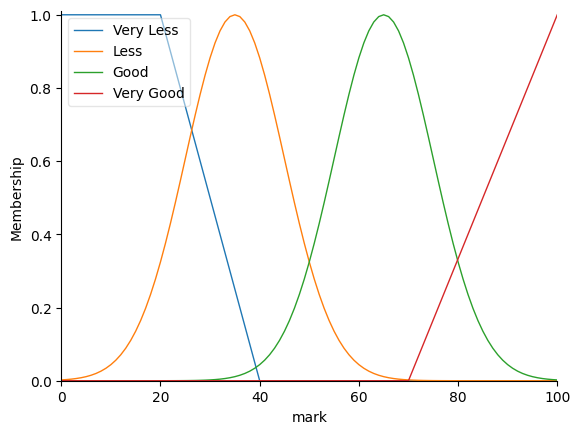

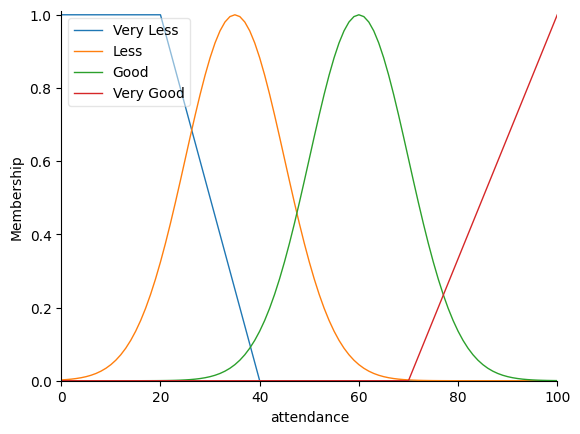

In [13]:
# Generate universe variables
mark = control.Antecedent(np.arange(0, 101, 1), 'mark') # 0-100
mark['Very Less'] = fuzz.trapmf(mark.universe, [0, 0, 20, 40])
mark['Less'] = fuzz.gaussmf(mark.universe, mean=35, sigma=10)
mark['Good'] = fuzz.gaussmf(mark.universe, mean=65, sigma=10)
mark['Very Good'] = fuzz.trapmf(mark.universe, [70, 100, 100, 100])

attendance = control.Antecedent(np.arange(0, 101, 1), 'attendance') # 0-100
attendance['Very Less'] = fuzz.trapmf(attendance.universe, [0, 0, 20, 40])
attendance['Less'] = fuzz.gaussmf(attendance.universe, mean=35, sigma=10)
attendance['Good'] = fuzz.gaussmf(attendance.universe, mean=60, sigma=10)
attendance['Very Good'] = fuzz.trapmf(attendance.universe, [70, 100, 100, 100])


mark.view()
attendance.view()


**The Output**
1. Programming Performance 
    - Universe: 0-100
    - Fuzzy sets: Very Less, Less, Good, Very Good

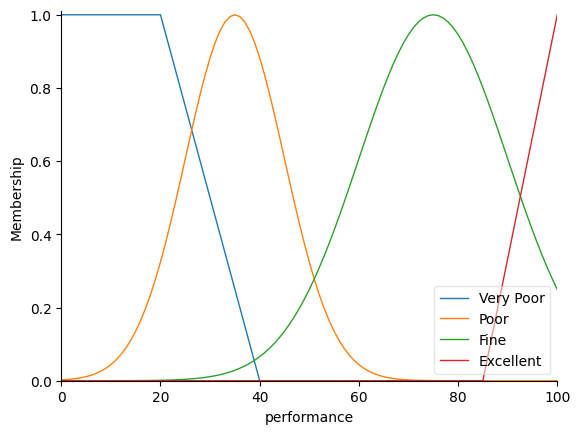

In [3]:
# Performance
performance = control.Consequent(np.arange(0, 101, 1), 'performance') # 0-100
performance['Very Poor'] = fuzz.trapmf(performance.universe, [0, 0, 20, 40])
performance['Poor'] = fuzz.gaussmf(performance.universe, mean=35, sigma=10)
performance['Fine'] = fuzz.gaussmf(performance.universe, mean=75, sigma=15)
performance['Excellent'] = fuzz.trapmf(performance.universe, [85, 100, 100, 100])

performance.view()

**Fuzzy Rules**

In the development of a Fuzzy Logic System (FLS), we formulated a rule base to regulate the output variable. Activation of a rule prompted an AND operation among the inputs, and this iterative process established the output membership functions for each rule. A fuzzy rule, characterized by a simple If-Then structure with conditions and conclusions, exemplifies this approach. 

For example, consider Rule-2: 
> *If (MARK is Less) and (ATTENDANCE is Less), then (PROGRAMMING PERFORMANCE is Poor).*

In [4]:
rules = [
    control.Rule(mark['Very Less'] & attendance['Very Less'], performance['Very Poor']),
    control.Rule(mark['Less'] & attendance['Less'], performance['Poor']),
    control.Rule(mark['Good'] & attendance['Good'], performance['Fine']),
    control.Rule(mark['Very Good'] & attendance['Very Good'], performance['Excellent']),
    control.Rule(mark['Good'] & attendance['Very Less'], performance['Very Poor']),
    control.Rule(mark['Good'] & attendance['Less'], performance['Poor']),
    control.Rule(mark['Very Good'] & attendance['Less'], performance['Poor']),
    control.Rule(mark['Very Less'] & attendance['Good'], performance['Very Poor']),
    control.Rule(mark['Less'] & attendance['Good'], performance['Poor']),
    control.Rule(mark['Very Less'] & attendance['Very Good'], performance['Very Poor']),
    control.Rule(mark['Less'] & attendance['Very Good'], performance['Poor']),
    control.Rule(mark['Very Good'] & attendance['Very Less'], performance['Very Poor']),
]
# rule1 = control.Rule(mark['Very Less'] & attendance['Very Less'], performance['Very Poor'])
# rule2 = control.Rule(mark['Less'] & attendance['Less'], performance['Poor'])
# rule3 = control.Rule(mark['Good'] & attendance['Good'], performance['Fine'])
# rule4 = control.Rule(mark['Very Good'] & attendance['Very Good'], performance['Excellent'])
# rule5 = control.Rule(mark['Good'] & attendance['Very Less'], performance['Very Poor'])
# rule6 = control.Rule(mark['Good'] & attendance['Less'], performance['Poor'])
# rule7 = control.Rule(mark['Very Good'] & attendance['Less'], performance['Poor'])
# rule8 = control.Rule(mark['Very Less'] & attendance['Good'], performance['Very Poor'])
# rule9 = control.Rule(mark['Less'] & attendance['Good'], performance['Poor'])
# rule10 = control.Rule(mark['Very Less'] & attendance['Very Good'], performance['Very Poor'])
# rule11 = control.Rule(mark['Less'] & attendance['Very Good'], performance['Poor'])
# rule12 = control.Rule(mark['Very Good'] & attendance['Very Less'], performance['Very Poor'])

for rule in rules:
    print(40*'-')
    print(rule)

----------------------------------------
IF mark[Very Less] AND attendance[Very Less] THEN performance[Very Poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Less] AND attendance[Less] THEN performance[Poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Good] AND attendance[Good] THEN performance[Fine]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Very Good] AND attendance[Very Good] THEN performance[Excellent]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Good] AND attendance[Very Less] THEN performance[Very Poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax
----------------------------------------
IF mark[Good] AND attendance[Less] THEN performance[Poor]
	AND aggregation function : fmin
	OR

**Defuzzification**

After the application of rules and the inference step, the resulting fuzzy value needs to undergo defuzzification to yield the ultimate output. The primary purpose of the defuzzifier component in the FLS is to derive this final output. Defuzzification is carried out based on the membership function of the output variable. The provided code illustrates an example of a student's rules and performance values, assuming the student achieves the following:

1. Overall mark = 54%
2. Attendance = 85%

The defuzzification process follows the Mamdani method, with the area between the input and output axes of the membership function shaded to reflect the accuracy of the rules.

Student's Programming Performance: 48.46%


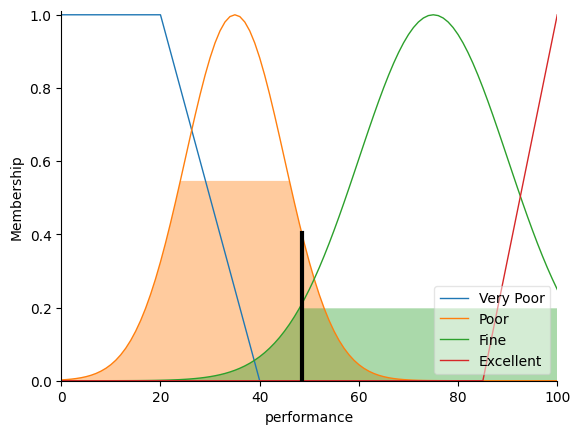

In [14]:
performance_ctrl = control.ControlSystem(rules)

performance_sim = control.ControlSystemSimulation(performance_ctrl)

performance_sim.input['mark'] = 54
performance_sim.input['attendance'] = 85

performance_sim.compute()

print(f"Student's Programming Performance: {performance_sim.output['performance']:.2f}%")
performance.view(sim=performance_sim)
plt.show()

## **Testing on Real Data**

**Function to Compute Performance Based on Marks and Attendance**

In [32]:
def compute_peformance(rules: list, mark: int, attendance: int) -> float:
    performance_ctrl = control.ControlSystem(rules)

    performance_sim = control.ControlSystemSimulation(performance_ctrl)

    performance_sim.input['mark'] = mark
    performance_sim.input['attendance'] = attendance

    performance_sim.compute()
    
    return performance_sim.output['performance']

**Import Data and Calculate Programming Performances**

In [40]:
import pandas as pd

df = pd.read_csv('./data/processed_data.csv')

performances = []
for idx, row in df.iterrows():
    marks = row['Marks']
    attendance = row['Attendance']
    
    performances.append(compute_peformance(rules, marks, attendance))
    
df['Performance'] = performances
df.to_csv('./data/result/final_data.csv', index=False)
df

,Matrics Num (hashed),Attendance,Occurrence,Marks,Performance
0,F0A0BEEB,75,OCC1,67,71.422624
1,A4ED03C6,0,OCC1,67,15.728539
2,6B2C616F,100,OCC1,64,35.652661
3,8DA718C9,75,OCC1,70,71.709756
4,D13F4F8F,75,OCC1,49,55.659828
...,...,...,...,...,...
174,0B226EF3,20,OCC4 RL,59,21.776724
175,189A37E7,60,OCC4 RL,80,68.754108
176,AE83DB4D,20,OCC4 RL,89,23.478385
177,351BA83F,60,OCC4 RL,62,71.769398


### **Performance Report**

**Overall Performance**

In [84]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values(by='Performance', ascending=False)

# TOP 20 STUDENTS
sorted_df.head(20)

,Matrics Num (hashed),Attendance,Occurrence,Marks,Performance
123,02B5EA8B,100,OCC3,93,94.617444
97,B3AEDA6D,100,OCC3,91,94.486165
19,27777AFE,100,OCC1,90,94.411947
18,E09ACC65,100,OCC1,88,94.247857
34,D2E9A1A3,100,OCC1,86,94.064290
120,E4B45EBF,100,OCC3,81,93.520965
76,D240E244,100,OCC2,80,93.394515
40,13581AB0,100,OCC1,79,93.258951
20,E9D4FBFA,100,OCC1,76,92.741507
52,507394DE,100,OCC1,76,92.741507


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


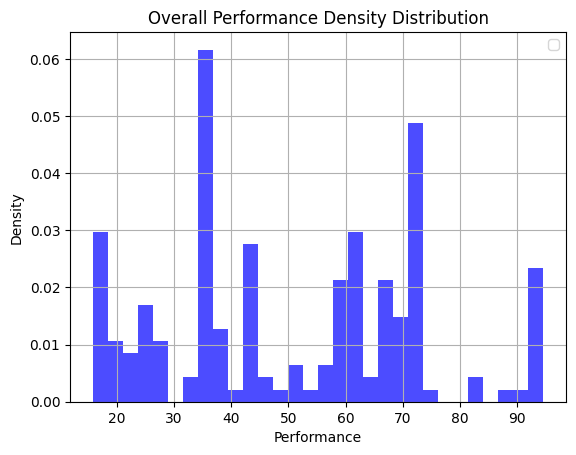

In [57]:
plt.hist(df['Performance'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Overall Performance Density Distribution')
plt.xlabel('Performance')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()

**Performance by Occurrences (Classes)**

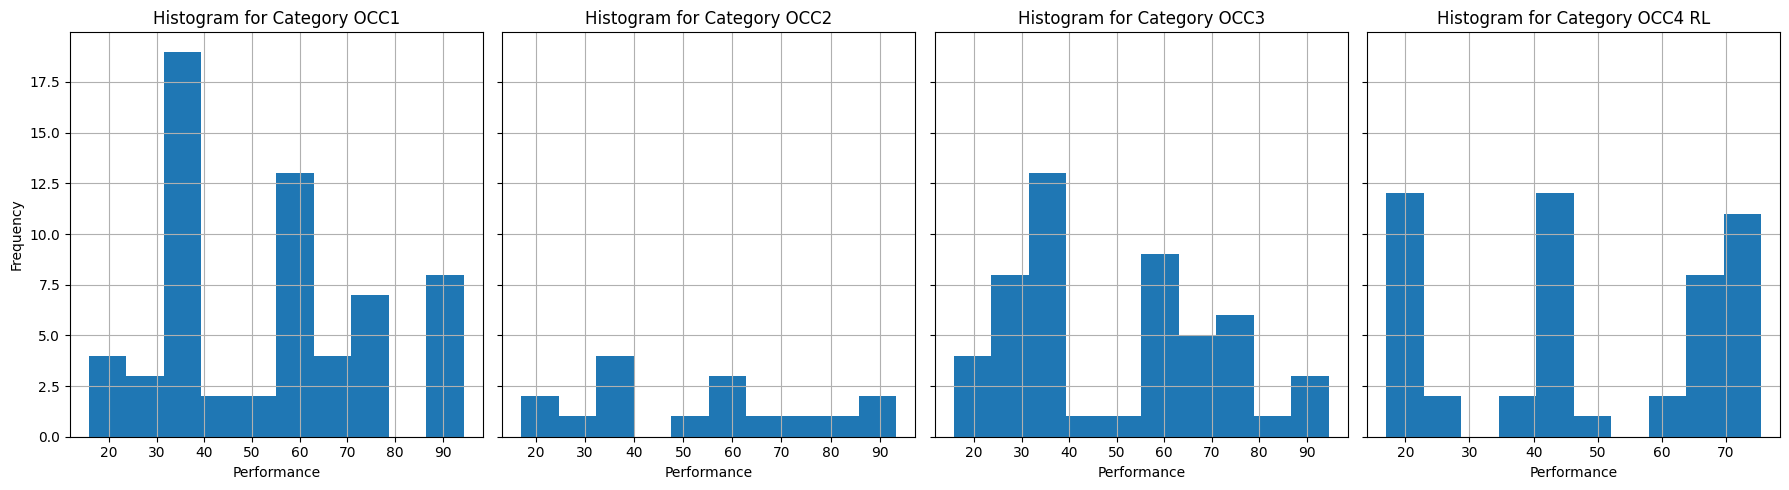

In [76]:
occ_df = df.groupby('Occurrence')
# occ_df.get_group('OCC1')

fig, axes = plt.subplots(nrows=1, ncols=len(occ_df), figsize=(18, 5), sharey=True)

for (category, data), ax in zip(occ_df, axes):
    data['Performance'].plot(kind='hist', ax=ax, title=f'Histogram for Category {category}')
    ax.set_xlabel('Performance')
    ax.set_ylabel('Frequency')
    ax.grid()

plt.tight_layout()
plt.show()

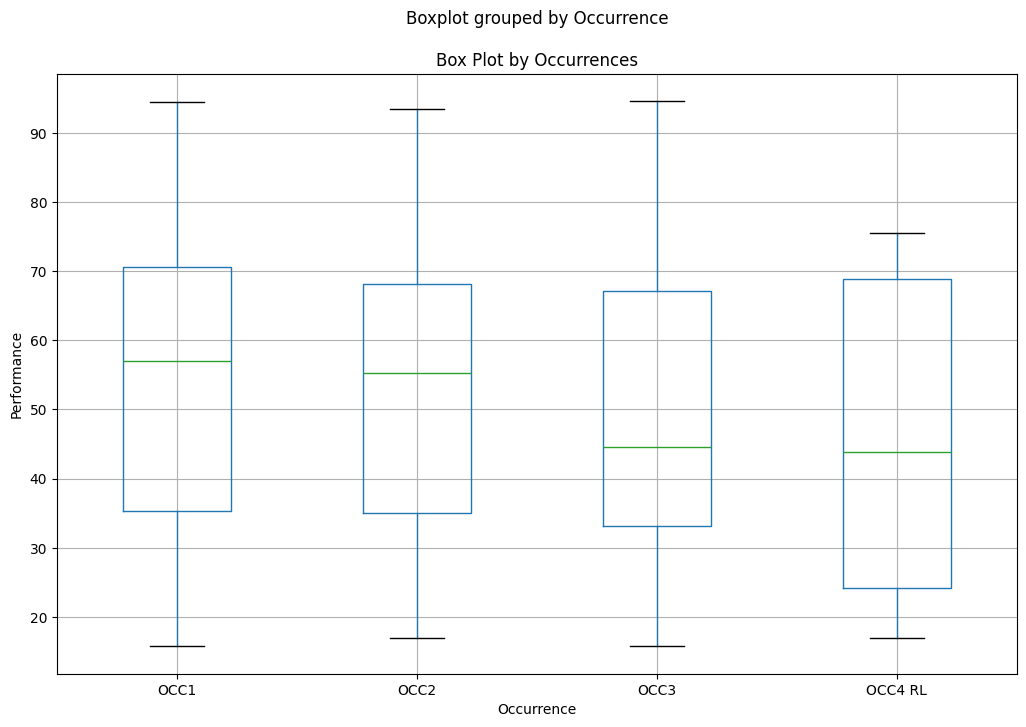

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))
df.boxplot(column='Performance', by='Occurrence', ax=ax)

# Set labels and title
plt.title('Box Plot by Occurrences')
plt.xlabel('Occurrence')
plt.ylabel('Performance')

plt.grid('off')
plt.show()